# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('07-x_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('07-x_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('07-y_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('07-y_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)


# **NORMALIZACION DE CARACTERISTICAS**

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [91]:
x_train_std

array([[-0.28, -0.68,  0.75, ...,  0.3 ,  0.4 ,  0.46],
       [-0.83, -1.08,  0.5 , ...,  0.15,  0.27, -1.37],
       [-0.83, -0.51,  0.45, ..., -0.22,  0.21, -1.57],
       ...,
       [ 0.05,  0.32, -0.94, ...,  0.03, -0.28,  1.5 ],
       [-0.78,  0.66, -0.7 , ..., -1.6 , -1.43, -0.33],
       [-0.31,  2.23, -2.69, ..., -1.94, -2.45, -0.35]])

# **MODELO DE MARCHINE LEARNING**

In [97]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               13312     
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 dense_62 (Dense)            (None, 32)                4128      
                                                                 
 dense_63 (Dense)            (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [98]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
73/73 [==============================] - 1s 2ms/step - loss: 0.9838 - accuracy: 0.5741
Epoch 2/800
73/73 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.6412
Epoch 3/800
73/73 [==============================] - 0s 2ms/step - loss: 0.7912 - accuracy: 0.6680
Epoch 4/800
73/73 [==============================] - 0s 2ms/step - loss: 0.7665 - accuracy: 0.6706
Epoch 5/800
73/73 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.6891
Epoch 6/800
73/73 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.6904
Epoch 7/800
73/73 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.7181
Epoch 8/800
73/73 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7194
Epoch 9/800
73/73 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7220
Epoch 10/800
73/73 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7415
Epoch 11/

array([2, 3, 2, 2, 3, 1, 2, 0, 0, 0, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 2, 3, 2, 2, 2, 3,
       2, 3, 3, 2, 0, 2, 1, 1, 2, 3, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0,
       2, 3, 0, 2, 3, 0, 3, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 0, 2,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 1, 3,
       1, 3, 1, 0, 3, 2, 0, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 1, 3, 3, 1, 3,
       0, 2, 2, 3, 3, 1, 1, 0, 3, 2, 3, 3, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 1,
       0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 1, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2,
       3, 1, 2, 2, 0, 1, 1, 3, 3, 2, 2, 0, 3, 2, 3, 1, 1, 3, 2, 3, 0, 2,
       1, 2, 0, 2, 2, 3, 3, 3, 2, 1, 0, 2, 3, 2, 2, 0, 0, 1, 3, 2, 0, 2,
       2, 2, 3, 2, 3, 3, 0, 1, 0, 2, 2, 1, 0, 0, 2, 3, 2, 3, 3, 2, 3, 2,
       3, 1, 1, 1, 2, 3, 0, 1, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 0, 3, 2, 0, 3, 3,

# **EVALUACION**

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        83
           1       0.64      0.53      0.58        96
           2       0.77      0.75      0.76       241
           3       0.74      0.81      0.77       159

    accuracy                           0.73       579
   macro avg       0.70      0.70      0.70       579
weighted avg       0.72      0.73      0.72       579



In [100]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        83
           1       0.64      0.53      0.58        96
           2       0.77      0.75      0.76       241
           3       0.74      0.81      0.77       159

    accuracy                           0.73       579
   macro avg       0.70      0.70      0.70       579
weighted avg       0.72      0.73      0.72       579

Matriz de confusión, sin normalización
[[ 61   4  15   3]
 [ 16  51  21   8]
 [ 13  15 180  33]
 [  3  10  18 128]]


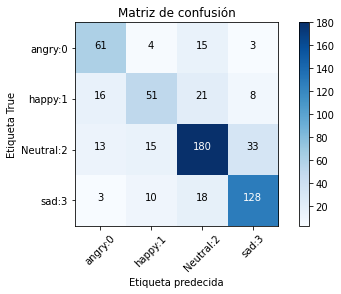

In [101]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

# **GUARDANDO MODELOS **

Normalizacion

In [102]:
import joblib
joblib.dump(sc , '267_Normalizacion.pkl')

['267_Normalizacion.pkl']

Modelo entrenado

In [103]:
import joblib
joblib.dump(clf , '267_Modelo_Prueba.pkl')

INFO:tensorflow:Assets written to: ram://9b1f5d94-5776-45cc-a680-c9a371ec8078/assets


['267_Modelo_Prueba.pkl']